## Problem 4
### Question a

In [113]:
# Import Libraries 
import numpy as np
import matplotlib.pyplot as plt

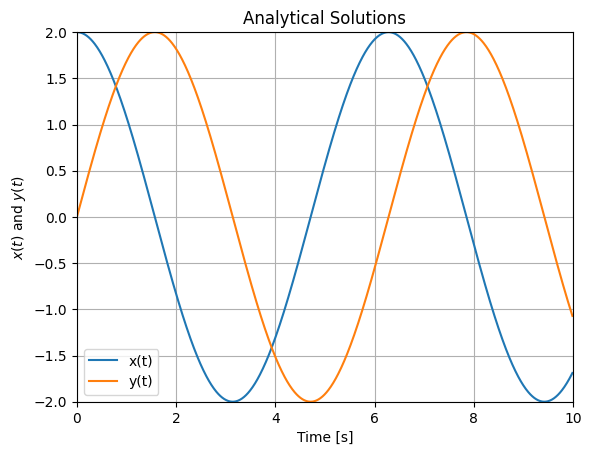

In [114]:
# Start Time, End time, DT
tInitial, tFinal, h = 0, 10, 0.01
# Arrays to save time, x and y
tExact = np.arange(tInitial, tFinal, h)
xExact = np.zeros(tExact.shape)
yExact = np.zeros(tExact.shape)
# For every time incerement calculate the solution
for i in range (tExact.shape[0]):
    xExact[i] = 2 * np.cos(tExact[i])
    yExact[i] = 2 * np.sin(tExact[i])
# ---------------> Plot <---------------------
# Create Figure and axes
fig, ax = plt.subplots()
# Plot title
plt.title("Analytical Solutions")
# Plot Curves
ax.plot(tExact, xExact, label="x(t)")
ax.plot(tExact, yExact, label="y(t)")
# Legend
ax.legend(loc='lower left')
# Axes Labels
ax.set_xlabel('Time [s]')
ax.set_ylabel(r'$x(t)$' + " and " + r'$y(t)$')
# Axes values to show
ax.set_xlim((0, 10))
ax.set_ylim((-2, 2))
# Axes Ticks
ax.set_xticks(np.linspace(ax.get_xticks()[0], ax.get_xticks()[-1], len(ax.get_xticks())))
ax.set_yticks(np.linspace(ax.get_yticks()[0], ax.get_yticks()[-1], len(ax.get_yticks())))
# Grid
ax.grid(zorder=0)

### Question b

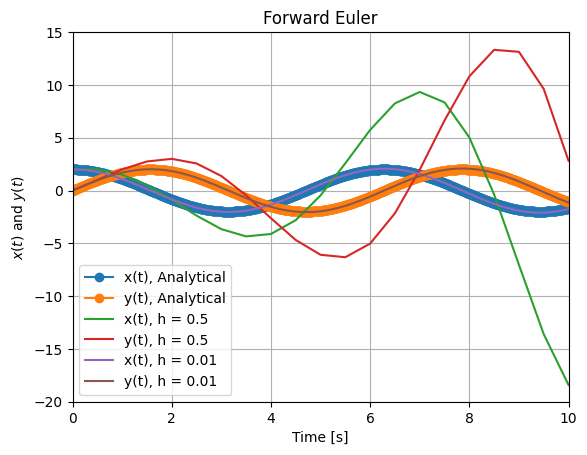

In [115]:
def myODESolver(x0, tInitial, tFinal, h, gamma):
    # Create a time array for the current h 
    time=np.arange(tInitial, tFinal + h, h)
    # Arrays to save u, v and assign the initial conditions
    u = np.zeros((time.shape[0], 2))
    v = np.zeros((time.shape[0], 2))
    u[0] = x0[0, :]
    v[0] = x0[1, :]
    for i in range(time.shape[0] - 1):
        v[i+1, 0] = (-u[i,1]-h*(1-gamma)*v[i,1]-h*gamma*u[i,0]- (h**2)*gamma*(1-gamma)*v[i,0])
        v[i+1, 1] = (-h*gamma*u[i,1]-(h**2)*gamma*(1-gamma)*v[i,1] + u[i,0]+h*(1-gamma)*v[i,0])
        u[i+1, 0] = u[i,0]+h*(1-gamma)*v[i,0]+gamma*v[i+1,0]
        u[i+1, 1] = u[i,1]+h*(1-gamma)*v[i,1]+gamma*v[i+1,1]
    return time, u, v

# Initial Conditions
x0 = np.array([[2, 0], [0, 2]])
# Start Time, End time
tInitial, tFinal=0, 10
# Different values of DT
h = [0.5, 0.01]
# Forward Euler
gamma = 0

# -------------------> Plots <------------------
# Create Figure and axes
fig, ax = plt.subplots()
# Plot title
plt.title("Forward Euler")
# Plot Curves
ax.plot(tExact, xExact, '-o', label="x(t), Analytical")
ax.plot(tExact, yExact, '-o', label="y(t), Analytical")
for i in range(len(h)):
    t, u, v = myODESolver(x0, tInitial, tFinal, h[i], gamma)
    ax.plot(t, u[:, 0], label="x(t), h = " + str(h[i]))
    ax.plot(t, u[:, 1], label="y(t), h = " + str(h[i]))
# Legend
ax.legend(loc='lower left')
# Axes Labels
ax.set_xlabel('Time [s]')
ax.set_ylabel(r'$x(t)$' + " and " + r'$y(t)$')
# Axes values to show
ax.set_xlim((0, max(tExact)))
# Axes Ticks
ax.set_xticks(np.linspace(ax.get_xticks()[0], ax.get_xticks()[-1], len(ax.get_xticks())))
ax.set_yticks(np.linspace(ax.get_yticks()[0], ax.get_yticks()[-1], len(ax.get_yticks())))
# Grid
ax.grid(zorder=0)

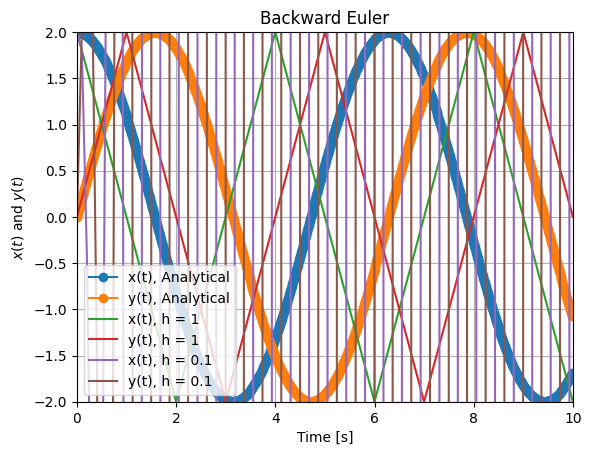

In [116]:
def myODESolver(x0, tInitial, tFinal, h, gamma):
    # Create a time array for the current h 
    time=np.arange(tInitial, tFinal + h, h)
    # Arrays to save u, v and assign the initial conditions
    u = np.zeros((time.shape[0], 2))
    v = np.zeros((time.shape[0], 2))
    u[0] = x0[0, :]
    v[0] = x0[1, :]
    for i in range(time.shape[0] - 1):
        v[i+1, 0] = (-u[i,1]-h*(1-gamma)*v[i,1]-h*gamma*u[i,0]- (h**2)*gamma*(1-gamma)*v[i,0])
        v[i+1, 1]=(-h*gamma*u[i,1]-(h**2)*gamma*(1-gamma)*v[i,1] + u[i,0]+h*(1-gamma)*v[i,0])
        u[i+1, 0] =u[i,0]+h*(1-gamma)*v[i,0]+gamma*v[i+1,0]
        u[i+1, 1]=u[i,1]+h*(1-gamma)*v[i,1]+gamma*v[i+1,1]
    return time, u, v

# Initial Conditions
x0 = np.array([[2, 0], [0, 2]])
# Start Time, End time
tInitial, tFinal=0, 10
# Different values of DT
h = [1, 0.1]
# Backward Euler
gamma = 1

# -------------------> Plots <------------------
# Create Figure and axes
fig, ax = plt.subplots()
# Plot title
plt.title("Backward Euler")
# Plot Curves
ax.plot(tExact, xExact, '-o', label="x(t), Analytical")
ax.plot(tExact, yExact, '-o', label="y(t), Analytical")
for i in range(len(h)):
    t, u, v = myODESolver(x0, tInitial, tFinal, h[i], gamma)
    ax.plot(t, u[:, 0], label="x(t), h = " + str(h[i]))
    ax.plot(t, u[:, 1], label="y(t), h = " + str(h[i]))
# Legend
ax.legend(loc='lower left')
# Axes Labels
ax.set_xlabel('Time [s]')
ax.set_ylabel(r'$x(t)$' + " and " + r'$y(t)$')
# Axes values to show
ax.set_xlim((0, 10))
ax.set_ylim((-2, 2))
# Axes Ticks
ax.set_xticks(np.linspace(ax.get_xticks()[0], ax.get_xticks()[-1], len(ax.get_xticks())))
ax.set_yticks(np.linspace(ax.get_yticks()[0], ax.get_yticks()[-1], len(ax.get_yticks())))
# Grid
ax.grid(zorder=0)

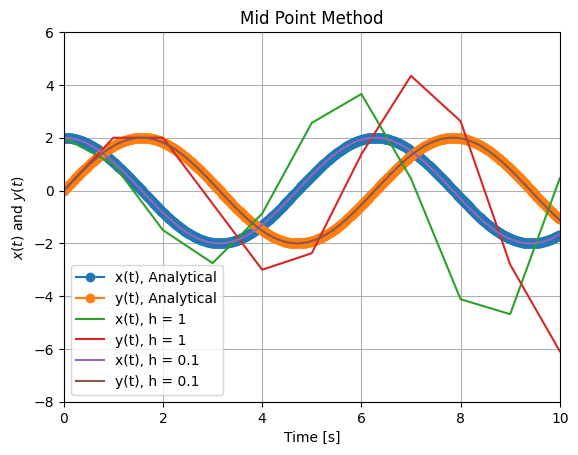

In [117]:
def myFunction(x, t):
    f = np.array([-x[1], x[0]]) 
    return f

def myMidpointMethod(x0, tInitial, tFinal, h):  
    # Create a time array for the current h 
    time = np.arange(tInitial, tFinal + h, h)
    # Create an array to store the solutions
    x = np.zeros((time.shape[0], x0.shape[0]))
    # Set the initial x0
    x[0, :] = x0
    for i in range(1, time.shape[0]):
        # Calculate the slope, s1
        s1 = myFunction(x[i-1, :], tInitial + (i-1)*h)
        # Calculate the slope, s2
        s2 = myFunction(x[i-1, :] + s1 * h/2, tInitial + (i-0.5)*h)
        # Update next step
        x[i, :] = x[i-1, :] + h * s2
    return time, x

# Initial Point
x0 = np.array([2.0, 0.0])
# Start Time, End time, DT
tInitial, tFinal=0, 10
# Different values of DT
h = [1, 0.1]
# -------------------> Plots <------------------
# Create Figure and axes
fig, ax = plt.subplots()
# Plot title
plt.title("Mid Point Method")
# Plot Curves
ax.plot(tExact, xExact, '-o', label="x(t), Analytical")
ax.plot(tExact, yExact, '-o', label="y(t), Analytical")
for i in range(len(h)):
    t, x = myMidpointMethod(x0, tInitial, tFinal, h[i])
    ax.plot(t, x[:, 0], label="x(t), h = " + str(h[i]))
    ax.plot(t, x[:, 1], label="y(t), h = " + str(h[i]))
# Legend
ax.legend(loc='lower left')
# Axes Labels
ax.set_xlabel('Time [s]')
ax.set_ylabel(r'$x(t)$' + " and " + r'$y(t)$')
# Axes values to show
ax.set_xlim((0, 10))
# Axes Ticks
ax.set_xticks(np.linspace(ax.get_xticks()[0], ax.get_xticks()[-1], len(ax.get_xticks())))
ax.set_yticks(np.linspace(ax.get_yticks()[0], ax.get_yticks()[-1], len(ax.get_yticks())))
# Grid
ax.grid(zorder=0)

### Question c

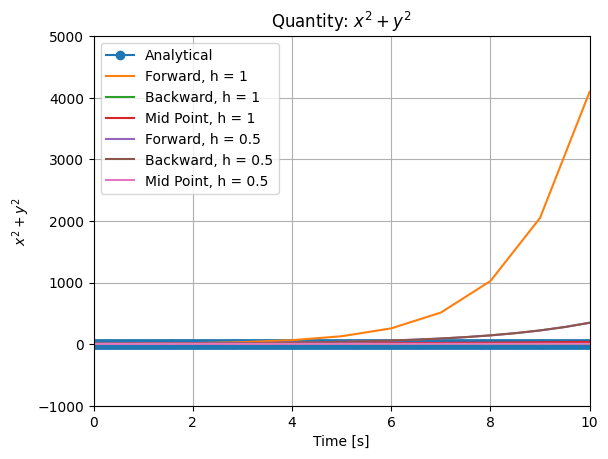

In [118]:
def myFunction(x, t):
    f = np.array([-x[1], x[0]]) 
    return f

def myMidpointMethod(x0, tInitial, tFinal, h):  
    # Create a time array for the current h 
    time = np.arange(tInitial, tFinal + h, h)
    # Create an array to store the solutions
    x = np.zeros((time.shape[0], x0.shape[0]))
    # Set the initial x0
    x[0, :] = x0
    for i in range(1, time.shape[0]):
        # Calculate the slope, s1
        s1 = myFunction(x[i-1, :], tInitial + (i-1)*h)
        # Calculate the slope, s2
        s2 = myFunction(x[i-1, :] + s1 * h/2, tInitial + (i-0.5)*h)
        # Update next step
        x[i, :] = x[i-1, :] + h * s2
    return time, x

def myODESolver(x0, tInitial, tFinal, h, gamma):
    # Create a time array for the current h 
    time=np.arange(tInitial, tFinal + h, h)
    # Arrays to save u, v and assign the initial conditions
    u = np.zeros((time.shape[0], 2))
    v = np.zeros((time.shape[0], 2))
    u[0] = x0[0, :]
    v[0] = x0[1, :]
    for i in range(time.shape[0] - 1):
        v[i+1, 0] = (-u[i,1]-h*(1-gamma)*v[i,1]-h*gamma*u[i,0]- (h**2)*gamma*(1-gamma)*v[i,0])
        v[i+1, 1]=(-h*gamma*u[i,1]-(h**2)*gamma*(1-gamma)*v[i,1] + u[i,0]+h*(1-gamma)*v[i,0])
        u[i+1, 0] =u[i,0]+h*(1-gamma)*v[i,0]+gamma*v[i+1,0]
        u[i+1, 1]=u[i,1]+h*(1-gamma)*v[i,1]+gamma*v[i+1,1]
    return time, u, v

# Initial Conditions
x0 = np.array([[2, 0], [0, 2]])
# Start Time, End time
tInitial, tFinal=0, 10
# Different values of DT
h = [1, 0.5]
# Forward Euler
gamma = 0

# -------------------> Plots <------------------
# Create Figure and axes
fig, ax = plt.subplots()
# Plot title
plt.title("Quantity: " + r'$x^2 + y^2$')
# Plot Curves
ax.plot(tExact, (xExact**2 + yExact**2), '-o', label="Analytical")
for i in range(len(h)):
    t, u, v = myODESolver(x0, tInitial, tFinal, h[i], 0)
    ax.plot(t, (u[:, 0]**2 + u[:, 1]**2), label="Forward, h = " + str(h[i]))
    t, u, v = myODESolver(x0, tInitial, tFinal, h[i], 1)
    ax.plot(t, (u[:, 0]**2 + u[:, 1]**2), label="Backward, h = " + str(h[i]))
    t, x = myMidpointMethod(x0[0, :], tInitial, tFinal, h[i])
    ax.plot(t, (x[:, 0]**2 + x[:, 1]**2), label="Mid Point, h = " + str(h[i]))
# Legend
ax.legend(loc='upper left')
# Axes Labels
ax.set_xlabel("Time [s]")
ax.set_ylabel(r'$x^2 + y^2$')
# Axes values to show
ax.set_xlim((0, max(tExact)))
# Axes Ticks
ax.set_xticks(np.linspace(ax.get_xticks()[0], ax.get_xticks()[-1], len(ax.get_xticks())))
ax.set_yticks(np.linspace(ax.get_yticks()[0], ax.get_yticks()[-1], len(ax.get_yticks())))
# Grid
ax.grid(zorder=0)

### Commnets
The Backward Euler is not able to predict the analytical solution even by decreasing the time step. One the other hand the other methods are pretty accurate. 

### Question d
#### Central Difference

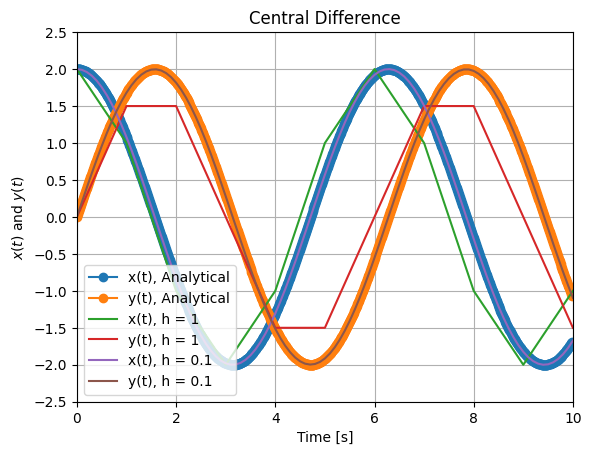

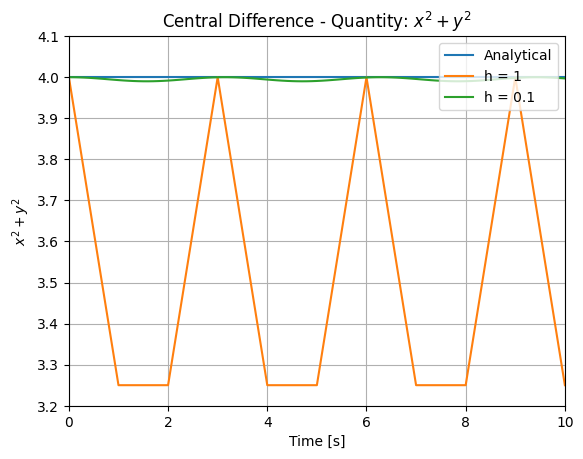

In [119]:
def myODESolver(x0, tInitial, tFinal, h, gamma, beta):
    # Create a time array for the current h 
    time = np.arange(tInitial, tFinal + h, h)
    # Arrays to save u, v and assign the initial conditions
    d = np.zeros(time.shape[0])
    v = np.zeros(time.shape[0])
    a = np.zeros(time.shape[0])
    d[0] = x0[0]
    v[0] = x0[1]
    a[0] = x0[2]
    for i in range(time.shape[0] - 1):
        # Equation 3 
        d[i+1] = (d[i] + h * v[i] + 0.5 * (h**2) * (1-2*beta) * a[i]) / (1 + (h**2) * beta)
        # Equation 5 
        a[i+1] = -d[i+1]
        # Equation 4 
        v[i+1] = v[i] + h * ( (1-gamma) * a[i] + gamma * a[i+1])
    return time, d, a, v

# Start Time, End time
tInitial, tFinal = 0, 10
# Different values of DT
h = [1, 0.1]
# Initial Conditions
x0 = [2, 0, -2]
# Beta and Gamma Parameters
beta, gamma = 0, 0.5

# -------------------> Plot 1 <------------------
# Create Figure and axes
fig, ax = plt.subplots()
# Plot title
plt.title("Central Difference")
# Plot Curves
ax.plot(tExact, xExact, '-o', label="x(t), Analytical")
ax.plot(tExact, yExact, '-o', label="y(t), Analytical")
for i in range(len(h)):
    t, d, a, v = myODESolver(x0, tInitial, tFinal, h[i], gamma, beta)
    ax.plot(t, d, label="x(t), h = " + str(h[i]))
    ax.plot(t, -v, label="y(t), h = " + str(h[i]))
# Legend
ax.legend(loc='lower left')
# Axes Labels
ax.set_xlabel('Time [s]')
ax.set_ylabel(r'$x(t)$' + " and " + r'$y(t)$')
# Axes values to show
ax.set_xlim((0, max(tExact)))
# Axes Ticks
ax.set_xticks(np.linspace(ax.get_xticks()[0], ax.get_xticks()[-1], len(ax.get_xticks())))
ax.set_yticks(np.linspace(ax.get_yticks()[0], ax.get_yticks()[-1], len(ax.get_yticks())))
# Grid
ax.grid(zorder=0)
# -------------------> Plot 2 <------------------
# Create Figure and axes
fig, ax = plt.subplots()
# Plot title
plt.title("Central Difference - Quantity: " + r'$x^2 + y^2$')
# Plot Curves
ax.plot(tExact, (xExact**2 + yExact**2), '-', label="Analytical")
for i in range(len(h)):
    t, d, a, v = myODESolver(x0, tInitial, tFinal, h[i], gamma, beta)
    ax.plot(t, (d**2 + v**2), label="h = " + str(h[i]))
# Legend
ax.legend(loc='upper right')
# Axes Labels
ax.set_xlabel('Time [s]')
ax.set_ylabel(r'$x^2 + y^2$')
# Axes values to show
ax.set_xlim((0, 10))
# Axes Ticks
ax.set_xticks(np.linspace(ax.get_xticks()[0], ax.get_xticks()[-1], len(ax.get_xticks())))
ax.set_yticks(np.linspace(ax.get_yticks()[0], ax.get_yticks()[-1], len(ax.get_yticks())))
# Grid
ax.grid(zorder=0)

#### Newmark Avergae Acceleration

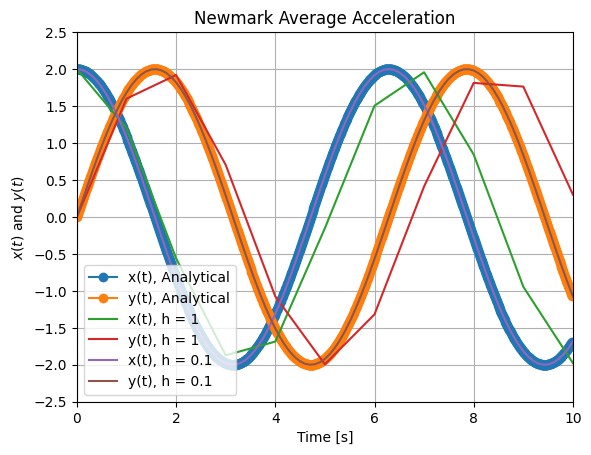

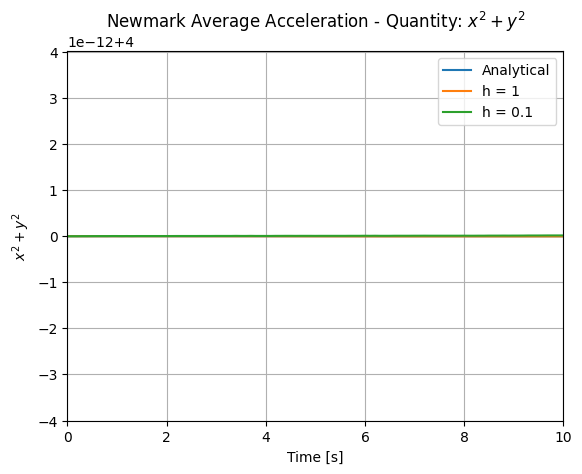

In [120]:
def myODESolver(x0, tInitial, tFinal, h, gamma, beta):
    # Create a time array for the current h 
    time = np.arange(tInitial, tFinal + h, h)
    # Arrays to save u, v and assign the initial conditions
    d = np.zeros(time.shape[0])
    v = np.zeros(time.shape[0])
    a = np.zeros(time.shape[0])
    d[0] = x0[0]
    v[0] = x0[1]
    a[0] = x0[2]
    for i in range(time.shape[0] - 1):
        # Equation 3 
        d[i+1] = (d[i] + h * v[i] + 0.5 * (h**2) * (1-2*beta) * a[i]) / (1 + (h**2) * beta)
        # Equation 5 
        a[i+1] = -d[i+1]
        # Equation 4 
        v[i+1] = v[i] + h * ( (1-gamma) * a[i] + gamma * a[i+1])
    return time, d, a, v

# Start Time, End time
tInitial, tFinal = 0, 10
# Different values of DT
h = [1, 0.1]
# Initial Conditions
x0 = [2, 0, -2]
# Beta and Gamma Parameters
beta, gamma = 0.25, 0.5
# -------------------> Plot 1 <------------------
# Create Figure and axes
fig, ax = plt.subplots()
# Plot title
plt.title("Newmark Average Acceleration")
# Plot Curves
ax.plot(tExact, xExact, '-o', label="x(t), Analytical")
ax.plot(tExact, yExact, '-o', label="y(t), Analytical")
for i in range(len(h)):
    t, d, a, v = myODESolver(x0, tInitial, tFinal, h[i], gamma, beta)
    ax.plot(t, d, label="x(t), h = " + str(h[i]))
    ax.plot(t, -v, label="y(t), h = " + str(h[i]))
# Legend
ax.legend(loc='lower left')
# Axes Labels
ax.set_xlabel('Time [s]')
ax.set_ylabel(r'$x(t)$' + " and " + r'$y(t)$')
# Axes values to show
ax.set_xlim((0, max(tExact)))
# Axes Ticks
ax.set_xticks(np.linspace(ax.get_xticks()[0], ax.get_xticks()[-1], len(ax.get_xticks())))
ax.set_yticks(np.linspace(ax.get_yticks()[0], ax.get_yticks()[-1], len(ax.get_yticks())))
# Grid
ax.grid(zorder=0)
# -------------------> Plot 2 <------------------
# Create Figure and axes
fig, ax = plt.subplots()
# Plot title
plt.title("Newmark Average Acceleration - Quantity: " + r'$x^2 + y^2$')
# Plot Curves
ax.plot(tExact, (xExact**2 + yExact**2), '-', label="Analytical")
for i in range(len(h)):
    t, d, a, v = myODESolver(x0, tInitial, tFinal, h[i], gamma, beta)
    ax.plot(t, (d**2 + v**2), label="h = " + str(h[i]))
# Legend
ax.legend(loc='upper right')
# Axes Labels
ax.set_xlabel('Time [s]')
ax.set_ylabel(r'$x^2 + y^2$')
# Axes values to show
ax.set_xlim((0, 10))
# Axes Ticks
ax.set_xticks(np.linspace(ax.get_xticks()[0], ax.get_xticks()[-1], len(ax.get_xticks())))
ax.set_yticks(np.linspace(ax.get_yticks()[0], ax.get_yticks()[-1], len(ax.get_yticks())))
# Grid
ax.grid(zorder=0)

#### Newmark Linear Acceleration 

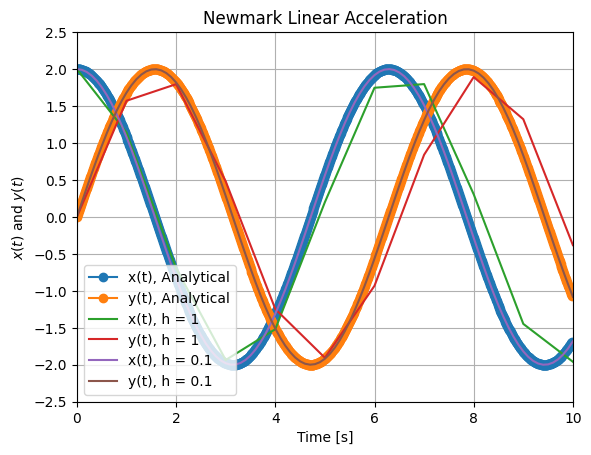

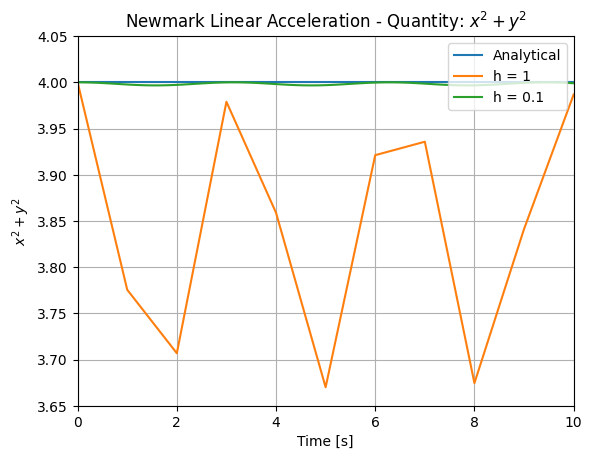

In [121]:
def myODESolver(x0, tInitial, tFinal, h, gamma, beta):
    # Create a time array for the current h 
    time = np.arange(tInitial, tFinal + h, h)
    # Arrays to save u, v and assign the initial conditions
    d = np.zeros(time.shape[0])
    v = np.zeros(time.shape[0])
    a = np.zeros(time.shape[0])
    d[0] = x0[0]
    v[0] = x0[1]
    a[0] = x0[2]
    for i in range(time.shape[0] - 1):
        # Equation 3 
        d[i+1] = (d[i] + h * v[i] + 0.5 * (h**2) * (1-2*beta) * a[i]) / (1 + (h**2) * beta)
        # Equation 5 
        a[i+1] = -d[i+1]
        # Equation 4 
        v[i+1] = v[i] + h * ( (1-gamma) * a[i] + gamma * a[i+1])
    return time, d, a, v

# Start Time, End time
tInitial, tFinal = 0, 10
# Different values of DT
h = [1, 0.1]
# Initial Conditions
x0 = [2, 0, -2]
# Beta and Gamma Parameters
beta, gamma = 1/6, 0.5
# -------------------> Plot 1 <------------------
# Create Figure and axes
fig, ax = plt.subplots()
# Plot title
plt.title("Newmark Linear Acceleration")
# Plot Curves
ax.plot(tExact, xExact, '-o', label="x(t), Analytical")
ax.plot(tExact, yExact, '-o', label="y(t), Analytical")
for i in range(len(h)):
    t, d, a, v = myODESolver(x0, tInitial, tFinal, h[i], gamma, beta)
    ax.plot(t, d, label="x(t), h = " + str(h[i]))
    ax.plot(t, -v, label="y(t), h = " + str(h[i]))
# Legend
ax.legend(loc='lower left')
# Axes Labels
ax.set_xlabel('Time [s]')
ax.set_ylabel(r'$x(t)$' + " and " + r'$y(t)$')
# Axes values to show
ax.set_xlim((0, max(tExact)))
# Axes Ticks
ax.set_xticks(np.linspace(ax.get_xticks()[0], ax.get_xticks()[-1], len(ax.get_xticks())))
ax.set_yticks(np.linspace(ax.get_yticks()[0], ax.get_yticks()[-1], len(ax.get_yticks())))
# Grid
ax.grid(zorder=0)
# -------------------> Plot 2 <------------------
# Create Figure and axes
fig, ax = plt.subplots()
# Plot title
plt.title("Newmark Linear Acceleration - Quantity: " + r'$x^2 + y^2$')
# Plot Curves
ax.plot(tExact, (xExact**2 + yExact**2), '-', label="Analytical")
for i in range(len(h)):
    t, d, a, v = myODESolver(x0, tInitial, tFinal, h[i], gamma, beta)
    ax.plot(t, (d**2 + v**2), label="h = " + str(h[i]))
# Legend
ax.legend(loc='upper right')
# Axes Labels
ax.set_xlabel('Time [s]')
ax.set_ylabel(r'$x^2 + y^2$')
# Axes values to show
ax.set_xlim((0, 10))
# Axes Ticks
ax.set_xticks(np.linspace(ax.get_xticks()[0], ax.get_xticks()[-1], len(ax.get_xticks())))
ax.set_yticks(np.linspace(ax.get_yticks()[0], ax.get_yticks()[-1], len(ax.get_yticks())))
# Grid
ax.grid(zorder=0)

### Commnets

1) In the Newmark Average Acceleration Method the quantity $x^2 + y^2$ remains equal to 4 regardless the timestep.

2) In all methods, by decreasing the time step they are producing more accurate results. 